In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import joblib
from tensorflow.keras import layers, models

In [2]:
data = pd.read_excel('Data2.xlsx', parse_dates=True, index_col=0)

In [3]:
data.head()

,Gr_Lev,WL,P,ET0
Date,,,,
2013-12-13 12:00:00,246.31,36,0.0,1.942490
2013-12-14 12:00:00,246.32,37,0.0,2.048930
2013-12-15 12:00:00,246.32,37,0.0,1.945416
2013-12-16 12:00:00,246.32,37,0.0,1.588460
2013-12-17 12:00:00,246.31,36,0.0,1.797454


In [4]:
columns = [0, 1, 2, 3]
i = 1
values = data.values

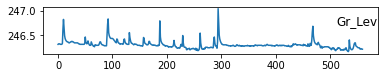

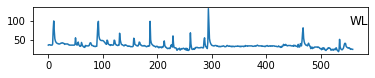

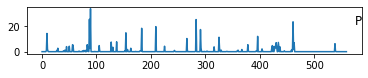

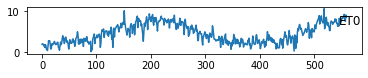

In [5]:
for variable in columns:
     plt.subplot(len(columns), 1, i)
     plt.plot(values[:, variable])
     plt.title(data.columns[variable], y=0.5, loc='right')
     i += 1
     plt.show()

In [6]:
values = data.values

In [7]:
values = values.astype('float32')

In [8]:
n = len(data)
train_data = data[:int(n*.7)]
val_data = data[int(n*.7):int(n*.9)]
test_data = data[int(n*.9):]

In [9]:
print(train_data)

                     Gr_Lev  WL    P       ET0
Date                                          
2013-12-13 12:00:00  246.31  36  0.0  1.942490
2013-12-14 12:00:00  246.32  37  0.0  2.048930
2013-12-15 12:00:00  246.32  37  0.0  1.945416
2013-12-16 12:00:00  246.32  37  0.0  1.588460
2013-12-17 12:00:00  246.31  36  0.0  1.797454
...                     ...  ..  ...       ...
2015-01-04 12:00:00  246.29  34  0.0  3.935899
2015-01-05 12:00:00  246.29  34  0.0  2.887920
2015-01-06 12:00:00  246.29  34  0.0  2.142022
2015-01-07 12:00:00  246.29  34  0.0  1.912281
2015-01-08 12:00:00  246.29  34  0.0  1.888303

[392 rows x 4 columns]


In [10]:
Gr_lev = train_data[train_data.columns[0:1]].to_numpy()

In [11]:
Gr_lev

array([[246.31],
       [246.32],
       [246.32],
       [246.32],
       [246.31],
       [246.31],
       [246.31],
       [246.31],
       [246.33],
       [246.62],
       [246.82],
       [246.65],
       [246.49],
       [246.43],
       [246.4 ],
       [246.38],
       [246.37],
       [246.36],
       [246.36],
       [246.35],
       [246.34],
       [246.34],
       [246.35],
       [246.36],
       [246.36],
       [246.37],
       [246.37],
       [246.36],
       [246.36],
       [246.35],
       [246.34],
       [246.34],
       [246.34],
       [246.34],
       [246.34],
       [246.34],
       [246.34],
       [246.33],
       [246.32],
       [246.32],
       [246.31],
       [246.31],
       [246.31],
       [246.31],
       [246.31],
       [246.31],
       [246.31],
       [246.31],
       [246.31],
       [246.33],
       [246.46],
       [246.36],
       [246.33],
       [246.32],
       [246.34],
       [246.38],
       [246.33],
       [246.31],
       [246.29

In [12]:
train_mean = train_data.mean()
train_std = train_data.std()

train_data1 = (train_data - train_mean) / train_std 
val_data1 = (val_data - train_mean) / train_std 
test_data1 = (test_data - train_mean) / train_std 


In [13]:
train_std

Gr_Lev     0.091360
WL        10.810689
P          3.334237
ET0        2.234251
dtype: float64

In [14]:
print(train_data1)

                       Gr_Lev        WL         P       ET0
Date                                                       
2013-12-13 12:00:00 -0.038812 -0.033508 -0.225092 -1.091628
2013-12-14 12:00:00  0.070644  0.058993 -0.225092 -1.043989
2013-12-15 12:00:00  0.070644  0.058993 -0.225092 -1.090319
2013-12-16 12:00:00  0.070644  0.058993 -0.225092 -1.250084
2013-12-17 12:00:00 -0.038812 -0.033508 -0.225092 -1.156544
...                       ...       ...       ...       ...
2015-01-04 12:00:00 -0.257726 -0.218510 -0.225092 -0.199424
2015-01-05 12:00:00 -0.257726 -0.218510 -0.225092 -0.668476
2015-01-06 12:00:00 -0.257726 -0.218510 -0.225092 -1.002323
2015-01-07 12:00:00 -0.257726 -0.218510 -0.225092 -1.105149
2015-01-08 12:00:00 -0.257726 -0.218510 -0.225092 -1.115882

[392 rows x 4 columns]


In [15]:
Gr_Lev1 = train_data1[train_data1.columns[0:1]].to_numpy()

In [16]:
Gr_Lev1

array([[-0.03881241],
       [ 0.07064416],
       [ 0.07064416],
       [ 0.07064416],
       [-0.03881241],
       [-0.03881241],
       [-0.03881241],
       [-0.03881241],
       [ 0.18010073],
       [ 3.35434126],
       [ 5.54347266],
       [ 3.68271097],
       [ 1.93140585],
       [ 1.27466643],
       [ 0.94629672],
       [ 0.72738358],
       [ 0.61792701],
       [ 0.50847044],
       [ 0.50847044],
       [ 0.39901387],
       [ 0.2895573 ],
       [ 0.2895573 ],
       [ 0.39901387],
       [ 0.50847044],
       [ 0.50847044],
       [ 0.61792701],
       [ 0.61792701],
       [ 0.50847044],
       [ 0.50847044],
       [ 0.39901387],
       [ 0.2895573 ],
       [ 0.2895573 ],
       [ 0.2895573 ],
       [ 0.2895573 ],
       [ 0.2895573 ],
       [ 0.2895573 ],
       [ 0.2895573 ],
       [ 0.18010073],
       [ 0.07064416],
       [ 0.07064416],
       [-0.03881241],
       [-0.03881241],
       [-0.03881241],
       [-0.03881241],
       [-0.03881241],
       [-0

In [17]:
def create_dataset (data, input_width=1, offset=0,predict_column='Gr_Lev'):
    x = []
    y = []
    data_x = data.to_numpy()
    data_y = data[predict_column].to_numpy()
   
    
    for i in range(input_width, len(data_x) - offset):
        x.append(data_x[i - input_width:i, :])
        y.append(data_y[i + offset])

        
    x = np.array(x)
    y = np.array(y)
    
    return x, y.reshape(-1,1)

In [18]:
train_ds = create_dataset(train_data1)
val_ds = create_dataset(val_data1)
test_ds = create_dataset(test_data1)

In [19]:
model = models.Sequential()
model.add(layers.LSTM(64, return_sequences=True, input_shape=train_ds[0].shape[1:]))
model.add(layers.Dense(units=1))

In [20]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.fit(x=train_ds[0], y=train_ds[1], validation_data=(val_ds[0], val_ds[1]), epochs=50)

Epoch 1/50
13/13 [==============================] - 3s 52ms/step - loss: 0.9019 - accuracy: 0.0000e+00 - val_loss: 0.3689 - val_accuracy: 0.0000e+00
Epoch 2/50
13/13 [==============================] - 0s 7ms/step - loss: 0.7958 - accuracy: 0.0000e+00 - val_loss: 0.3259 - val_accuracy: 0.0000e+00
Epoch 3/50
13/13 [==============================] - 0s 6ms/step - loss: 0.7130 - accuracy: 0.0000e+00 - val_loss: 0.2862 - val_accuracy: 0.0000e+00
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 0.6451 - accuracy: 0.0000e+00 - val_loss: 0.2493 - val_accuracy: 0.0000e+00
Epoch 5/50
13/13 [==============================] - 0s 7ms/step - loss: 0.5884 - accuracy: 0.0000e+00 - val_loss: 0.2216 - val_accuracy: 0.0000e+00
Epoch 6/50
13/13 [==============================] - 0s 6ms/step - loss: 0.5389 - accuracy: 0.0000e+00 - val_loss: 0.1996 - val_accuracy: 0.0000e+00
Epoch 7/50
13/13 [==============================] - 0s 6ms/step - loss: 0.5091 - accuracy: 0.0000e+00 - val_los

In [46]:
x, y =val_ds

In [47]:
y_pred = model.predict(x)

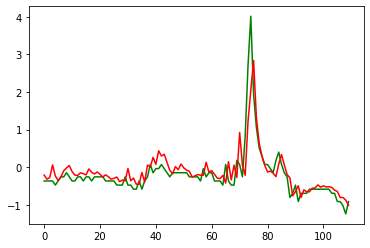

In [48]:
fig, ax = plt.subplots()
i=1
ax.plot(y[i:i+5000,0], c='g')
ax.plot(y_pred[i:i+5000,-1,0], c='r')

In [49]:
df_c = pd.DataFrame({'real': y[:,0], 'pred': y_pred[:,-1,0]})
df_c.corr()

,real,pred
real,1.00000,0.83976
pred,0.83976,1.00000


In [37]:
df_c.to_csv('real_pred_val')